---
layout: post
title:  "Unique Values, Groupby, and 5 Most Popular Languages on AO3"
date:   2021-05-07
category: data_cleaning visualization
tags: Python Pandas Seaborn
---

Continue with data cleaning, and a little bit of data analysis. Find the 5 most popular languages on AO3.

* Table of Contents
{:toc}

# Loading File

For details on how to load large csv files in Python, check out [Loading CSV Files in Python](2021-05-06-load-file.md). 

In [1]:
# Load Python library
import pandas as pd

# Load file
path="/home/pi/Downloads/works-20210226.csv"
chunker = pd.read_csv(path, chunksize=10000)
works = pd.concat(chunker, ignore_index=True)

# Selecting Columns

We need the language column to find out top 5 most popular languages on AO3. Let's create a new Series called "language".

In [4]:
# Select language col
language = works.language

# Drop NA values
language = language.dropna()

In [5]:
# Data set preview
language

0          en
1          en
2          en
3          en
4          en
           ..
7269688    en
7269689    en
7269690    en
7269691    en
7269692    en
Name: language, Length: 7269603, dtype: object

# Unique Values and Language Options

Using ```unique()``` to simply find out the list of languages available in the data set. We should keep in mind that there are more language options available on AO3. What we have here are languages with at least one work created in that language. Some languages do not currently have a work thus are not included in this data set.

In [7]:
# Find all language options
language.unique()

array(['en', 'zh', 'de', 'fr', 'es', 'ptBR', 'id', 'ru', 'yue', 'bos',
       'pl', 'ptPT', 'fil', 'vi', 'it', 'ms', 'ja', 'nl', 'hu', 'hak',
       'be', 'ro', 'cs', 'et', 'ko', 'th', 'wuu', 'fi', 'sv', 'el', 'afr',
       'sq', 'qtp', 'fa', 'hr', 'bg', 'ca', 'uk', 'sco', 'lv', 'ga', 'tr',
       'ar', 'hy', 'fur', 'lt', 'eu', 'so', 'mk', 'si', 'he', 'da', 'sk',
       'bn', 'arc', 'ia', 'slv', 'chn', 'br', 'no', 'hi', 'eo', 'mnc',
       'cy', 'hau', 'gl', 'ta', 'qkz', 'bod', 'mr', 'tlh', 'la', 'zu',
       'tqx', 'qya', 'gem', 'sjn', 'fcs', 'kat', 'sw', 'sr', 'is', 'pa',
       'gd', 'jv'], dtype=object)

In [8]:
# Find the total number of languages
len(language.unique())

85

To summarize, we have 85 languages present in the data set. In comparison, you can browse the entire [language options](https://archiveofourown.org/languages) on AO3 website.

# Value_counts for Series

```Value_counts()``` is limited to a Series and returns the frequencies of values. We can use it fo find the number of works in each language. For more complex DataFrame structures, ```Groupby()``` is used. More on that later.

In [12]:
# Find number of works in each language
language.value_counts()

en     6587693
zh      335179
ru      136724
es       70645
fr       32145
        ...   
hau          1
jv           1
zu           1
mnc          1
fur          1
Name: language, Length: 85, dtype: int64

In [14]:
# Combine the results into a new DataFrame
# Disable key as index with reset_index() 
# Rename columns

top_list = language.value_counts().reset_index()
top_list.columns = ['language', 'work_count']
top_list

,language,work_count
0,en,6587693
1,zh,335179
2,ru,136724
3,es,70645
4,fr,32145
...,...,...
80,hau,1
81,jv,1
82,zu,1
83,mnc,1


# Groupby for DataFrame

```Groupby``` is used to split the data set into groups, compute a summary statistic for each group, and combine the results into a new data structure. 

Here, we are going to split the data set into different languages, compute how many works (instances) under each language, and sort the data set so we can find top 5 most popular languages.

In [21]:
# group the language column by counting each language
works.groupby(['language']).size()

language
afr        38
ar         49
arc         6
be         52
bg         67
        ...  
vi       2178
wuu        46
yue       369
zh     335179
zu          1
Length: 85, dtype: int64

In [25]:
# Combine the results into a new DataFrame
# Disable key as index with reset_index() 
# Rename columns
# Sort in descending order, modify the existing df with inplace=True
# Update index using ignore_index=True

top_list2 = works.groupby(['language']).size().reset_index()
top_list2.columns = ['language', 'work_count']
top_list2.sort_values(by=['work_count'], ascending=False, inplace=True, ignore_index=True)
top_list2

,language,work_count
0,en,6587693
1,zh,335179
2,ru,136724
3,es,70645
4,fr,32145
...,...,...
80,fcs,1
81,fur,1
82,kat,1
83,pa,1


We have achieved the same results as using ```value_counts()```. We'll use more ```groupby()``` function when we add the creaton_date column and analyze language trend. More on that later. Let's find out the top 5 most popular languages on AO3.

# Top 5 Most Popular Languages on AO3

As shown in previous steps, we have prepared a clean, organized DataFrame called top_list for data analysis and visualization. Let's extract the top 5 rows into a new DataFrame called top5.

In [26]:
# Top 5 rows
top5 = top_list[:5].copy()
top5

,language,work_count
0,en,6587693
1,zh,335179
2,ru,136724
3,es,70645
4,fr,32145


In top5, we have the all-time most popular languages on AO3 (at the time of this writing) and the number of works in each language. Let's create a simple visualization to display the data.

# Simple Graph with Seaborn Library

There are several ways to plot graphs in Python, such as [Matplotlib](https://matplotlib.org/), [Pandas Plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), and [Seaborn](https://seaborn.pydata.org/), the latter two are based on matplotlib. Depending on the complexity of the graph, you can choose to use either one of the libraries.

In [27]:
# Import libraries
# Top line is Jupyter Notebook specific

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

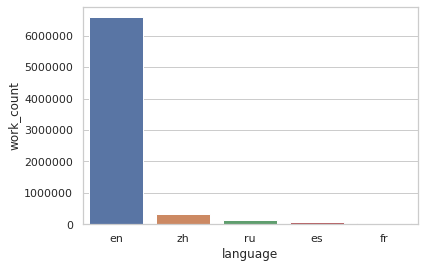

In [34]:
# Plot using Seaborn library
# Prevent scientific notation with ticklabel_format()

ax = sns.barplot(x="language", y="work_count", data=top5)
ax.ticklabel_format(style='plain', axis='y')